# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [3]:
data_fs.head(10)

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   
5  2011-09-06       67     46.0   14.0        NaN       NaN         NaN   
6  2011-09-08       25     14.0   10.0        NaN       NaN         NaN   
7  2011-09-09       44     44.0    5.0        NaN       NaN         NaN   
8  2011-09-10       42     27.0    5.0        NaN       NaN         NaN   
9  2011-09-13       36     21.0    9.0        NaN       NaN         NaN   

   num_room  kitch_sq  state  ... provision_retail_space_modern_sqm  \
0       NaN       NaN    NaN  ...                             271.0   
1       NaN       NaN    NaN  ...                             271.0   
2       NaN       NaN    NaN  ...                             271.0   
3       NaN       NaN    NaN  ...                             271.0   
4       NaN       NaN    NaN  ...                             271.0   
5       NaN       NaN    NaN  ...                             271.0   
6       NaN       NaN    NaN  ...                             271.0   
7       NaN       NaN    NaN  ...                             271.0   
8       NaN       NaN    NaN  ...                             271.0   
9       NaN       NaN    NaN  ...                             271.0   

  turnover_catering_per_cap  theaters_viewers_per_1000_cap  \
0                    6943.0                          565.0   
1                    6943.0                          565.0   
2                    6943.0                          565.0   
3                    6943.0                          565.0   
4                    6943.0                          565.0   
5                    6943.0                          565.0   
6                    6943.0                          565.0   
7                    6943.0                          565.0   
8                    6943.0                          565.0   
9                    6943.0                          565.0   

   seats_theather_rfmin_per_100000_cap  museum_visitis_per_100_cap  \
0                              0.45356                      1240.0   
1                              0.45356                      1240.0   
2                              0.45356                      1240.0   
3                              0.45356                      1240.0   
4                              0.45356                      1240.0   
5                              0.45356                      1240.0   
6                              0.45356                      1240.0   
7                              0.45356                      1240.0   
8                              0.45356                      1240.0   
9                              0.45356                      1240.0   

   bandwidth_sports  population_reg_sports_share  students_reg_sports_share  \
0          269768.0                        22.37                      64.12   
1          269768.0                        22.37                      64.12   
2          269768.0                        22.37                      64.12   
3          269768.0                        22.37                      64.12   
4          269768.0                        22.37                      64.12   
5          269768.0                        22.37                      64.12   
6          269768.0                        22.37                      64.12   
7          269768.0                        22.37                      64.12   
8          269768.0                        22.37                      64.12   
9          269768.0                        22.37                      64.12   

   apartment_build  apartment_fund_sqm  
0          23587.0            2

The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [4]:
# fill nan with 0
data_fs = data_fs.fillna(0)

# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, sparse=True)

In [5]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
14065       46     44.0    7.0       25.0       1.0      2015.0       1.0   
12978       77     48.0   17.0       17.0       4.0      2009.0       3.0   
18695       39     18.0    7.0       17.0       1.0         0.0       1.0   
26411       52     52.0    9.0       17.0       1.0         0.0       2.0   
1419        30     18.0    1.0        0.0       0.0         0.0       0.0   
29787       99      0.0   12.0        0.0       1.0      2015.0       4.0   
18411       40      0.0   17.0       17.0       1.0         0.0       1.0   
11541       31     17.0    1.0        9.0       2.0      1964.0       1.0   
20741       55      0.0    6.0        0.0       1.0         0.0       2.0   
13103       58     42.0    7.0        9.0       1.0      1974.0       3.0   

       kitch_sq  state        area_m  ...  child_on_acc_pre_school_3,013  \
14065       1.0    1.0  1.139168e+07  ...                              0   
12978       9.0    3.0  1.631523e+07  ...                              1   
18695       9.0    0.0  5.293465e+06  ...                              0   
26411       1.0    1.0  2.553630e+07  ...                              0   
1419        0.0    0.0  2.641243e+06  ...                              0   
29787       1.0    1.0  4.441296e+06  ...                              0   
18411       1.0    1.0  1.139168e+07  ...                              0   
11541       6.0    2.0  4.662813e+06  ...                              1   
20741      12.0    1.0  6.677245e+07  ...                              0   
13103       6.0    2.0  4.389199e+06  ...                              1   

       child_on_acc_pre_school_7,311  modern_education_share_0  \
14065                              0                         0   
12978                              0                         0   
18695                              0                         0   
26411                              0                         0   
1419                               1                         1   
29787                              0                         0   
18411                              0                         0   
11541                              0                         0   
20741                              0                         0   
13103                              0                         0   

       modern_education_share_90,92  modern_education_share_93,08  \
14065                             0                             1   
12978                             1                             0   
18695                             0                             1   
26411                             0                             1   
1419                              0                             0   
29787                             0                             0   
18411                             0                             1   
11541                             1                             0   
20741                             0                             1   
13103                             1                             0   

       modern_education_share_95,4918  old_education_build_share_0  \
14065                               0                            0   
12978                               0                            0   
18695                               0                            0   
26411                               0                            0   
1419                                0                            1   
29787                               1                            0   
18411                               0                            0   
11541                               0                            0   
20741                               0                            0   
13103                               0                            0   

       old_education_build_share_23,14  old_education_build_shar

Okay, now let's see how much data we have.

In [6]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fe420fb00>]],
      dtype=object)

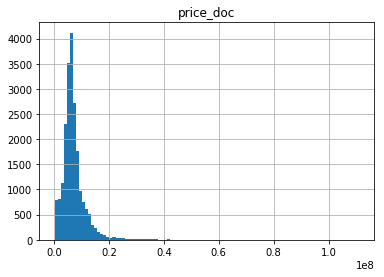

In [7]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fe420ffd0>]],
      dtype=object)

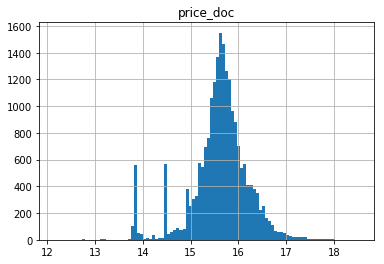

In [8]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

In [165]:
from sklearn.ensemble import RandomForestRegressor 

### BEGIN Solution

rf = RandomForestRegressor(n_estimators=100, random_state=228, n_jobs=2)
rf.fit(X_train, y_train_log.values.ravel())

std = np.std([estimator.feature_importances_ for estimator in rf.estimators_], axis=0)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

### END Solution

Print the 20 most important features and their **values**.

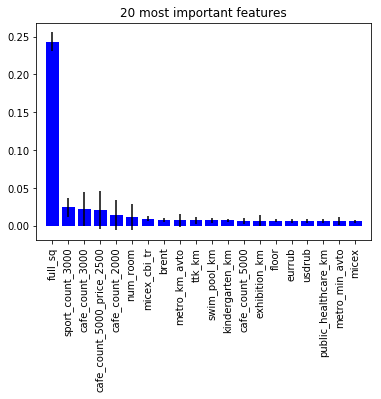

In [167]:
### BEGIN Solution

plt.figure()
plt.title("20 most important features")
plt.bar(range(20), importances[indices][:20],
       color="b", yerr=std[indices[:20]], align="center")
plt.xticks(range(20), [X_train.columns[indices[f]] for f in range(20)], 
           rotation='vertical')
plt.yticks()
plt.xlim([-1, 20])
plt.show()

### END Solution

In [169]:
features = pd.DataFrame(importances[indices[0:20]], 
                        index=X_train.columns[indices[0:20]],
                        columns=['value',])

features

value
full_sq                     0.243207
sport_count_3000            0.024459
cafe_count_3000             0.021852
cafe_count_5000_price_2500  0.020757
cafe_count_2000             0.014541
num_room                    0.011520
micex_cbi_tr                0.009192
brent                       0.007586
metro_km_avto               0.007576
ttk_km                      0.007517
swim_pool_km                0.007337
kindergarten_km             0.007168
cafe_count_5000             0.006948
exhibition_km               0.006825
floor                       0.006805
eurrub                      0.006757
usdrub                      0.006443
public_healthcare_km        0.006433
metro_min_avto              0.006409
micex                       0.006296

<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [41]:
from sklearn.metrics import mean_squared_log_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [42]:
X_train_best = X_train.filter(X_train.columns[indices[:20]].values.tolist(), 
                              axis=1)

X_test_best = X_test.filter(X_test.columns[indices[:20]].values.tolist(), 
                            axis=1)

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error

def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Lasso": linear_model.Lasso(), 
        "Ridge": linear_model.Ridge(),
        "Dtree": sklearn.tree.DecisionTreeRegressor(),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators =100)
    }

### BEGIN Solution
    err_train = []
    err_test = []

    for model in methods.values():
        model.fit(X_train, y_train.values.ravel())
        
        y_train_predicted = model.predict(X_train)
        y_test_predicted = model.predict(X_test)
        
        err_train.append(mean_squared_log_error(y_train_predicted, y_train))
        err_test.append(mean_squared_log_error(y_test_predicted, y_test))

### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": err_train,
        "Test loss": err_test
    })

Now apply this function

In [44]:
### BEGIN Solution

result = comparator(X_train_best, y_train_log, X_test_best, y_test_log)
print(result)

### END Solution

             Methods    Train loss  Test loss
0  Linear Regression  1.044498e-03   0.001054
1              Lasso  1.217445e-03   0.001197
2              Ridge  1.044497e-03   0.001054
3              Dtree  1.159749e-09   0.001731
4                RFR  1.232790e-04   0.000865


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [37]:
import warnings
warnings.filterwarnings("ignore")

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    cols = list(X)
    for feat in cols:
        if feat not in used_features:
            test_features = used_features[:]
            test_features.append(feat)
            score = cross_val_score(model, X[test_features], y,
                                    scoring="neg_mean_squared_log_error", cv=cv, n_jobs=4,
                                    error_score=np.nan)
            scores[feat] = abs(score.mean())
    ### END Solution

    return scores

In [64]:
def forward_steps(X, y, n_rounds, method):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    cur_round = 0
    best_score = 1000000
    while (cur_round < n_rounds and len(feat_best_list) != X.shape[1]):
        cur_round += 1
            
        scores = selection_step(method, X, y, feat_best_list)
        new_score, best_feat = min(zip(scores.values(), scores.keys()))
        feat_best_list.append(best_feat)
        
        if (new_score < best_score):
            best_score = new_score
            cur_round = 0
        print(best_feat)
    ### END Solution
    
    return feat_best_list

Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [65]:
### BEGIN Solution
from sklearn import tree

method = sklearn.tree.DecisionTreeRegressor(random_state=228)
best_features = forward_steps(X_train, y_train_log, 3, method)
### END Solution


full_sq
ecology_no data
sub_area_Nekrasovka
sub_area_Poselenie Vnukovskoe
sub_area_Poselenie Novofedorovskoe
sub_area_Poselenie Filimonkovskoe
sub_area_Zapadnoe Degunino
sub_area_Krylatskoe
sub_area_Hamovniki
sub_area_Poselenie Krasnopahorskoe
sub_area_Zamoskvorech'e
sub_area_Troickij okrug
sub_area_Poselenie Moskovskij
sub_area_Sokol'niki
sub_area_Birjulevo Zapadnoe
sub_area_Arbat
sub_area_Poselenie Kokoshkino
sub_area_Poselenie Rogovskoe
sub_area_Babushkinskoe
sub_area_Begovoe
sub_area_Poselenie Shherbinka
sub_area_Poselenie Voskresenskoe
sub_area_Poselenie Voronovskoe
sub_area_Poselenie Mihajlovo-Jarcevskoe
sub_area_Vostochnoe


Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [66]:
### BEGIN Solution

comparator(X_train[best_features], y_train_log, X_test[best_features], y_test_log)

### END Solution

Methods  Train loss  Test loss
0  Linear Regression    0.001155   0.001119
1              Lasso    0.001277   0.001252
2              Ridge    0.001155   0.001119
3              Dtree    0.000881   0.000938
4                RFR    0.000884   0.000928

<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

In [3]:
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, precision_score, f1_score

class GBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, epochs=5):
        self.base_estimator = base_estimator
        self.epochs = epochs
        
        self.func_list = []
        
    def _cur_aprox(self, X):
        result = self.func_list[0](X)
        
        for f in self.func_list[1:]:
            result += f(X)
            
        return result
         
        
    def fit(self, X, y):
        #initial weights
        gamma = 0
        self.func_list.append(lambda X: np.zeros(X.shape[0]))

        for i in range(self.epochs):
            func = self.func_list[-1]
            
            #calculate pseudo-residuals
            res = 2 * y / (1 + np.exp(2 *y * self._cur_aprox(X)))
            
            h = self.base_estimator
            h.fit(X, res)
            
            self.func_list.append(lambda X: h.predict(X))
            
        return self
            
    
    def _loss(self, y, y_predicted):
        return np.log(1 + np.exp(-2 * y * y_predicted))
    
    
    def predict(self, X):
        return np.sign(self._cur_aprox(X)).astype(np.int)

In [5]:
### BEGIN Solution

# h = DecisionTreeRegressor(max_depth=2)
# h.fit(X_train, y_train)
# h.predict(X_test)
# res = 2 * y / (1 + np.exp(2 * y * X[:,0]))

model = GBClassifier(DecisionTreeRegressor(max_depth=3), 6)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print (accuracy_score(y_test, y_predicted))

df = pd.DataFrame({'Accuracy' : accuracy_score(y_test, y_predicted),
                   'Precision': precision_score(y_test, y_predicted),
                   'f1-score' : f1_score(y_test, y_predicted)}, index=range(1))

df
### END Solution

0.975


Accuracy  Precision  f1-score
0     0.975   0.982456  0.973913

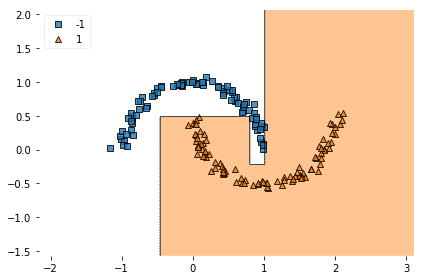

In [6]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X_train, y=y_train, clf=model, legend=2)
# ax.set_title(model.__class__.__name__ + ", accuracy = %g" % mean_accuarcy, size=16)
    
plt.tight_layout()
plt.show()

<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import catboost as ctb
import lightgbm as lgb

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

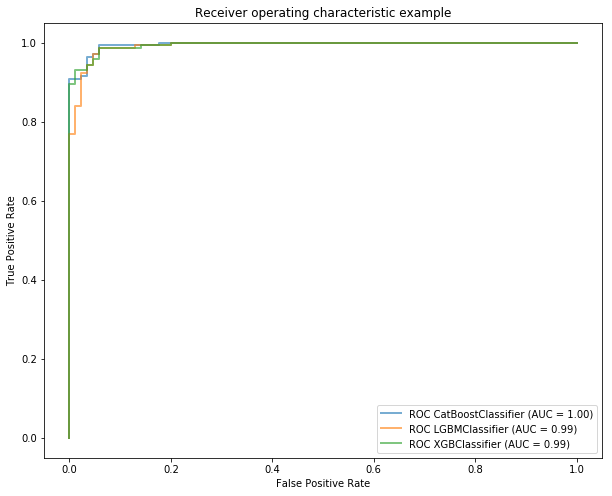

In [8]:
### BEGIN Solution

#default params: max_depth from XGBoost, n_estimators from LGBM
models = [
    ctb.CatBoostClassifier(logging_level='Silent', max_depth=6, n_estimators=100),
    lgb.LGBMClassifier(max_depth=6, n_estimators=100),
    xgb.XGBClassifier(max_depth=6, n_estimators=100)
]

plt.figure(figsize=(10,8))

#default params
for model in models:
    probas = model.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.6,
             label='ROC %s (AUC = %0.2f)' % (model.__class__.__name__, roc_auc))
    
### END Solution
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

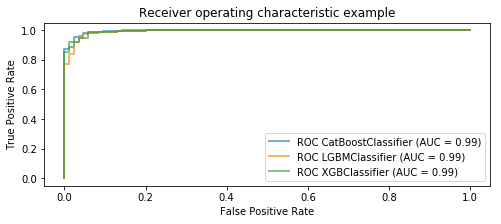

In [9]:
tunned_params = [{
    'max_depth' : range(2, 10, 2),
    'n_estimators' : range(40, 200, 20)
}]

cv = StratifiedKFold(n_splits=3)

plt.figure(figsize=(8,3))

for model in models:
    clf = GridSearchCV(model, tunned_params, cv=3, iid=True,
                       scoring='roc_auc', n_jobs=4, return_train_score=True)
    clf.fit(X_train, y_train)
    best = clf.best_estimator_
    probas = best.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.6,
             label='ROC %s (AUC = %0.2f)' % (best.__class__.__name__, roc_auc))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

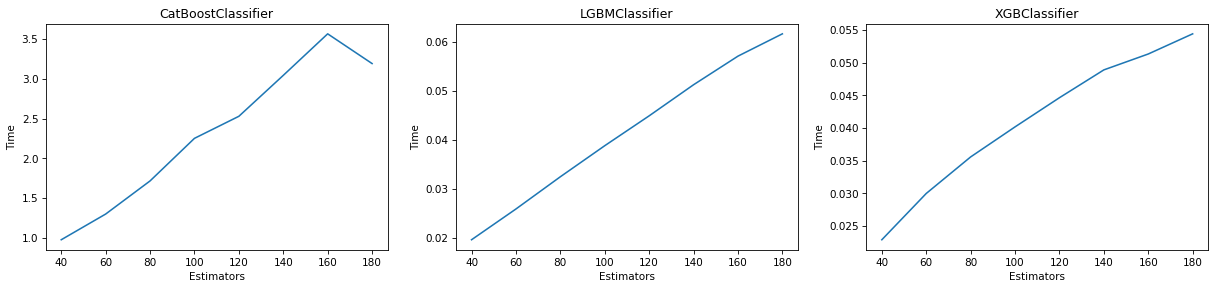

In [10]:
tunned_estimators = [{
    'n_estimators' : range(40, 200, 20)
}]


fig, axes = plt.subplots(
    ncols=3,
    nrows=1, 
    figsize=(20, 4),
    dpi=75
)

cv = StratifiedKFold(n_splits=3)
for model, ax in zip(models, axes):
    clf = GridSearchCV(model, tunned_estimators, cv=3, iid=True,
                       scoring='roc_auc', n_jobs=4, return_train_score=True)
    
    clf.fit(X_train, y_train)
    ax.plot(tunned_estimators[0]['n_estimators'], clf.cv_results_['mean_fit_time'])
    ax.set_xlabel('Estimators')
    ax.set_ylabel('Time')
    ax.set_title(model.__class__.__name__, size=12)
    
    
plt.show()

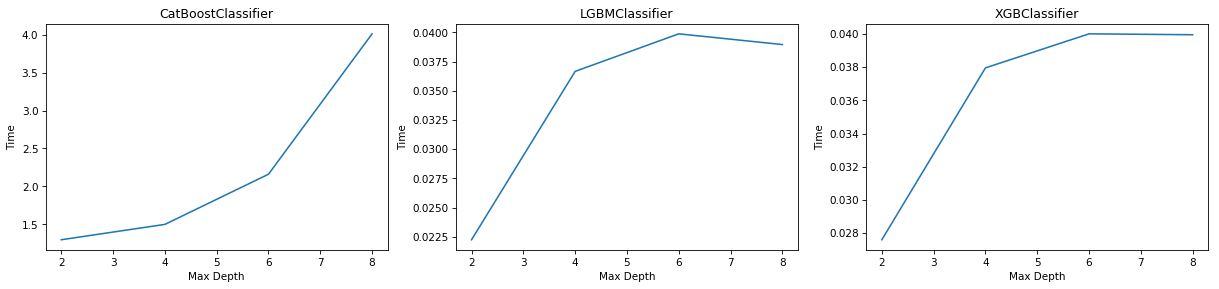

In [11]:
tunned_depth = [{
    'max_depth' : range(2, 10, 2),
}]

fig, axes = plt.subplots(
    ncols=3,
    nrows=1, 
    figsize=(20, 4),
    dpi=75
)

cv = StratifiedKFold(n_splits=3)
for model, ax in zip(models, axes):
    clf = GridSearchCV(model, tunned_depth, cv=3, iid=True,
                       scoring='roc_auc', n_jobs=4, return_train_score=True)
    
    clf.fit(X_train, y_train)
    ax.plot(tunned_depth[0]['max_depth'], clf.cv_results_['mean_fit_time'])
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Time')
    ax.set_title(model.__class__.__name__, size=12)
    
    
plt.show()

<br>

## NNs

### Task 6 (1 pt.): Activation functions
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

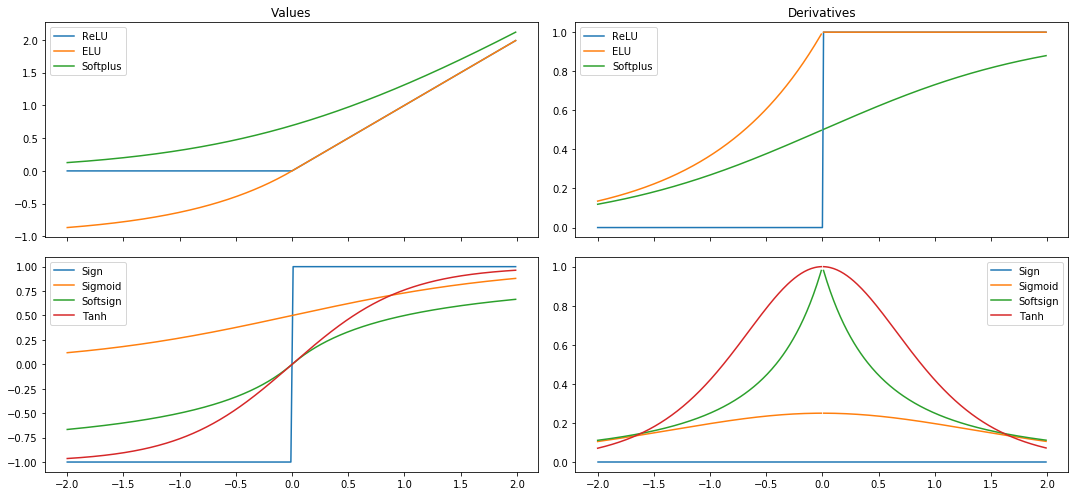

In [57]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch


x = torch.arange(-2, 2, .01, requires_grad=True)
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
        
        # ...
        x.grad.data.zero_()
        out = activation(x)
        # axes[i, 0].plot('xs', 'funcion values', label=function_name)
        axes[i, 0].plot(x.detach().numpy(), out.detach().numpy(), label=function_name)
        out.backward(x/x)
        # axes[i, 1].plot('xs', 'derivative values', label=function_name)
        axes[i, 1].plot(x.detach().numpy(), x.grad.numpy(), label=function_name)
        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

Heaviside function has 0 derivative everywhere except x = 0, which makes backprop useless, thus this activation function is bad. 

The same problem might have ReLU funtion due to fact that it has 0 derivative at x<0, so it fails net but not everywhere.

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

In [68]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

Implement the MLP with backprop.

In [159]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty_like(self.thetas)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty_like(self.bias)
        self.input_value = 0

    def forward(self, x): 
        self.input_value = x
        output = np.matmul(x, self.thetas) + self.bias
        return output

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = self.thetas.dot(output_grad)
        # self.thetas_grads += 
        self.thetas_grads += output_grad.dot(self.input_value.reshape(1,-1)).T
        # self.bias_grads += 
        self.bias_grads += np.sum(output_grad, axis=1)
        
        ### END Solution
        return input_grad


class LogisticActivation:
    def __init__(self):
        self.output_value = 0
        
    def forward(self, x):
        self.output_value = output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = output_grad * self.output_value.reshape(-1,1) * (1. - self.output_value.reshape(-1,1))
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def forward(self, x):
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        ### END Solution
        return input_grad
    

class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    
    def forward(self, x):
        return self.linear2.forward(self.activation1.forward(self.linear1.forward(x)))

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate and update grads
        output_grad = self.linear2.backward(x, output_grad)
        output_grad = self.activation1.backward(x, output_grad)
        output_grad = self.linear1.backward(x, output_grad)
        ### END Solution

In [121]:
### BEGIN Solution
# Please, implement here everything else you need, like the loss function.
def cross_entropy_loss(y_hat, y):
    softmax = SoftMaxActivation();
    y_hat = softmax.forward(y_hat)
    y_vec = np.zeros(y_hat.shape)
    loss = 0
    
    if (len(y_hat.shape) == 1):
        y_vec[y] = 1
        loss = - np.sum(y_vec * np.log(y_hat))
        grad = (y_hat - y_vec).reshape(-1, 1)
    else:
        for i in range(len(y_vec)):
            y_vec[i][y[i]] = 1
        loss = - np.sum(y_vec * np.log2(y_hat), axis=1)
        grad = (y_hat - y_vec).reshape(-1, 1)
    
    return loss, grad
### END Solution

Starting epoch 0 Starting epoch 10 Starting epoch 20 Starting epoch 30 Starting epoch 40 Starting epoch 50 Starting epoch 60 Starting epoch 70 Starting epoch 80 Starting epoch 90 Starting epoch 100 Starting epoch 110 Starting epoch 120 Starting epoch 130 Starting epoch 140 Starting epoch 150 Starting epoch 160 Starting epoch 170 Starting epoch 180 Starting epoch 190 Starting epoch 200 Starting epoch 210 Starting epoch 220 Starting epoch 230 Starting epoch 240 Starting epoch 250 Starting epoch 260 Starting epoch 270 Starting epoch 280 Starting epoch 290 Starting epoch 300 Starting epoch 310 Starting epoch 320 Starting epoch 330 Starting epoch 340 Starting epoch 350 Starting epoch 360 Starting epoch 370 Starting epoch 380 Starting epoch 390 Starting epoch 400 Starting epoch 410 Starting epoch 420 Starting epoch 430 Starting epoch 440 Starting epoch 450 Starting epoch 460 Starting epoch 470 Starting epoch 480 Starting epoch 490 

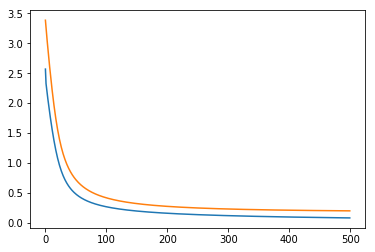

In [162]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 500
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]

        ### BEGIN Solution
        # ... zero the gradients
        mlp.linear1.thetas_grads.fill(0)
        mlp.linear1.bias_grads.fill(0)

        mlp.linear2.thetas_grads.fill(0)
        mlp.linear2.bias_grads.fill(0)
        # prediction = mlp.forward(x)
        prediction = mlp.forward(x)
        # loss = # use cross entropy loss
        loss, output_grad = cross_entropy_loss(prediction, target)
        # learning_curve[epoch] += loss
        learning_curve[epoch] += loss
        # ... perform backward pass
        grad = mlp.backward(x, output_grad)
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.thetas -= learning_rate * mlp.linear1.thetas_grads
        mlp.linear2.thetas -= learning_rate * mlp.linear2.thetas_grads
        mlp.linear1.bias   -= learning_rate * mlp.linear1.bias_grads
        mlp.linear2.bias   -= learning_rate * mlp.linear2.bias_grads
    
    learning_curve[epoch] /= train_size
    prediction = mlp.forward(x_test)
    loss, grad = cross_entropy_loss(prediction, y_test)
    test_curve[epoch] = loss.mean()
    ### END Solution

plt.plot(learning_curve)
plt.plot(test_curve)

In [163]:
predictions = np.argmax(mlp.forward(digits), axis=1)
pd.DataFrame(confusion_matrix(targets, predictions))

0    1    2    3    4    5    6    7    8    9
0  178    0    0    0    0    0    0    0    0    0
1    0  176    0    1    0    0    2    0    1    2
2    0    0  177    0    0    0    0    0    0    0
3    0    0    1  182    0    0    0    0    0    0
4    0    0    0    0  179    0    0    1    1    0
5    0    0    0    0    0  178    1    0    0    3
6    1    1    0    0    0    0  178    0    1    0
7    0    0    0    0    2    0    0  176    0    1
8    1    6    1    0    0    1    1    1  163    0
9    0    0    0    1    0    2    0    0    0  177

### Task 8 (3 pt.): Modelling real-life DL
In this task you will train your own CNN for dogs vs cats classification task. The goal of this task is not to get the highest accuracy possible (try getting the highest accuracy possible though) but to model the real-life process of training a deep neural network.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>
Training neural networks is a time consuming task and it can take days or even weeks. Try not to leave this task to the last day. It is not necessary for you to use GPU for this task, but using it may drastically reduce the time required for you to complete this task.

There is a good amount of datasets in [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html), but in practice, chances are that you wouldn't find the dataset for your particular problem, so you should be capable of writing `DataLoader` for your own dataset.

In [193]:
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import PIL.Image as Image
from torch import nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision import transforms, utils
import progressbar

Make sure you are using the right device.

In [194]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


First take a look at the data.

In [195]:
dt = pd.read_csv(r'data/cats_dogs/train.csv')
dt.head()

path  y
0  cats_dogs/train/dogs/dog.342.jpg  1
1  cats_dogs/train/cats/cat.661.jpg  0
2  cats_dogs/train/cats/cat.516.jpg  0
3  cats_dogs/train/dogs/dog.938.jpg  1
4  cats_dogs/train/cats/cat.224.jpg  0

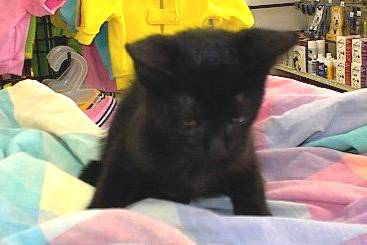

In [196]:
Image.open('data/' + dt['path'].iloc[1])

In [197]:
# global params
image_size = 224

batch_size = 32

workers = 2

ngpu = 2

lr = 0.0001

beta1 = 0.5

num_epochs = 100

Implement your [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

In [198]:
from PIL import Image

import os
import os.path
import sys

#Change class name 
class ImageDataset(Dataset):
    """ Some documantation"""

    def _pil_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to csv file
            root_dir (string): Root directory path.
        """
        
        self.df = pd.read_csv(csv_file)
        self.root = root_dir
        self.transform = transform
        

    def __getitem__(self, idx):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """

        path = self.root + '/' + self.df.iloc[idx]['path']
        target = self.df.iloc[idx]['y']
        
        sample= self._pil_loader(path)
        
        if self.transform is None:
            raise(RuntimeError("Transform is None"))
        else:
            img = self.transform(sample)
        
#         print (img.shape)
        
        return img, target
    
    
    def __len__(self):
        return self.df.shape[0]

In [199]:
root_path = os.getcwd() + '/data'
# print (root_path)
dataset = ImageDataset('data/cats_dogs/train.csv', root_path)
len(dataset)

2000

Define the augmentation tranform and instantiate training and validation subsets of your `Dataset` and the correpsonding [`DataLoaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [200]:
# data_transform = transforms.Compose([#transforms.RandomRotation(30),
#                                      transforms.Resize(image_size),
#                                      transforms.CenterCrop(image_size),
# #                                        transforms.RandomResizedCrop(256),
# #                                        transforms.RandomHorizontalFlip(),
#                                        transforms.ToTensor(),
#                                        transforms.Normalize([0.485, 0.456, 0.406],
#                                                             [0.229, 0.224, 0.225])])

data_transform_train = transforms.Compose(
    [transforms.Resize(image_size),
     transforms.CenterCrop(image_size),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(20),
     transforms.ToTensor()])
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_transform_test = transforms.Compose(
    [transforms.Resize(image_size),
     transforms.CenterCrop(image_size),
     transforms.ToTensor(),])
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

### BEGIN Solution
dataset_train = ImageDataset('data/cats_dogs/train.csv', root_path, transform=data_transform_train)
dataset_val = ImageDataset('data/cats_dogs/validation.csv', root_path, transform=data_transform_test)

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size,
                                           shuffle=True, num_workers=workers)
val_loader = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size,
                                         shuffle=False, num_workers=workers)
### END Solution

Make sure that dataloader works as expected by observing one sample from it.

tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]],

        [[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]],

        [[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]]])
tensor(1)


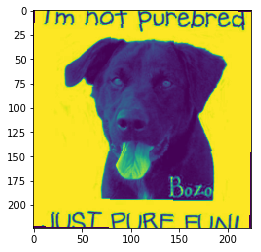

In [201]:
X, y = next(iter(train_loader))
print(X[0])
print(y[0])
plt.imshow(np.array(X[0,0,:,:]))

Implement your model below. You can use any layers that you want, but in general the structure of your model should be
1. convolutional feature extractor, followed by
2. fully-connected classifier.

In [202]:
# class model_name(nn.Module):
#     def __init__(self, inp_ch=1, outp_ch=2):
#         super().__init__()
#         ### BEGIN Solution
#         # ...
#         ### END Solution
       


#     def forward(self, input):
#         ### BEGIN Solution
#         # ...
#         ### END Solution
        
# class Classifier(nn.Module):
#     def __init__(self, nc=3, ndf=64):
#         super(Classifier, self).__init__()
#         self.main = nn.Sequential(
#             # input is (nc) x 64 x 64
#             nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf) x 32 x 32
#             nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 2),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf*2) x 16 x 16
#             nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 4),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf*4) x 8 x 8
#             nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 8),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf*8) x 4 x 4
#             nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, input):
#         return self.main(input)
    
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.dropout = nn.Dropout(0.6)
        self.fc1 = nn.Linear(64*25*25, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, 2)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
#         print (x.shape)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.softmax(self.fc3(x))
        
        return x
    
# class Net(nn.Module):
#     def __init__(self, nc=3, ndf=16):
#         super(Net, self).__init__()
        
#         self.ndf = ndf
        
#         self.convol = nn.Sequential(
#             # input is (nc) x 64 x 64
#             nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf) x 32 x 32
#             nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 2),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf*2) x 16 x 16
#             nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 4),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf*4) x 8 x 8
#             nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 8),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (ndf*8) x 4 x 4
# #             nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
# #             nn.LeakyReLU(0.2, inplace=True),
#         )
        
#         self.linear = nn.Sequential(
#             nn.Linear((ndf * 8) * 4 * 4, 256),
#             nn.Dropout(),
#             nn.Linear(256, 256),
#             nn.Dropout(),
#             nn.Linear(256, 2),
#             nn.LogSoftmax(dim=1)
#         )

#     def forward(self, input):
#         x = self.convol(input)
#         x = x.view(x.size(0), -1)
#         x = self.linear(x)
#         return x
        
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.convol = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.Conv2d(16, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(16, 32, 3, padding=1),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Dropout(),
            nn.ReLU()
        )
        
        self.linear = nn.Sequential(
            nn.Linear(64 * 28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 84),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(84, 2),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, input):
        x = self.convol(input)
#         print (x.shape)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x    
    
# create a complete CNN

In [188]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

Send your model to GPU, if you have it.

In [159]:
# model = Classifier().to(device)
model = Net().to(device)

# if (device.type == 'cuda') and (ngpu > 1):
#     netD = nn.DataParallel(model, list(range(ngpu)))
    
# model.apply(weights_init)

Implement your loss function below, or use the predefined loss, suitable for this task.

In [189]:
### BEGIN Solution
# criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()
### END Solution

Try two different [optimizers](http://ruder.io/optimizing-gradient-descent/index.html) and choose one. For the optimizer of your choice, try two different sets of parameters (e.g learning rate). Explain both of your choices and back them with the learning performance of the network (see the rest of the task).

In this parts of the task you may try more than two options, but, please, leave in your solution only the results for two different optimizers and two different sets of parameters.

In [165]:
### BEGIN Solution
lr=1e-4
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-7)
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.003, momentum= 0.9)
### END Solution

You may finally train you model. Don't forget to:
1. monitor its training and validation performance *during training*, i.e plot the loss functions and prediction accuracy for train and validation sets, to make sure that your model doesn't learn complete nonsense; **do not** include tons of learning curves in your homework solution; (in real-life, you may find [`tensorboardX`](https://github.com/lanpa/tensorboardX) extremely useful for this task);
2. visualize its training and validation performance *after training*, to demonstrate that you have accomplished the task;
3. save the state of your model during the training, to use the best one at the end; you may find useful this [tutorial on saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html);
4. send the input and target data to the same device as your model.

Your model should be able to show *at least 75% validation accuracy*.

You may also find useful the following parts of documentation: [`Module.train`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train), [`Module.eval`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval), [`Module.state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.state_dict), [`Module.load_state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.load_state_dict).

In [190]:
def save_model_state(model, path):
    torch.save({
        'model_state_dict': model.state_dict(),
    }, path)
    
def load_model_state(model, path):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    
def accuracy_score(model, val_loader):
    correct = 0
    total = 0

    model.eval()

    with torch.no_grad():
        for data in val_loader:
            samples = data[0].to(device)
            labels = data[1].to(device)
            outputs = model(samples)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network: %d %%' % (100 * correct / total))


    model.train()

In [191]:
def train(model, optimizer, num_epochs=20):
    model_losses_train = []
    model_losses_val = []
    model_accuracy_val = []

    it = 0

    with progressbar.ProgressBar(max_value = num_epochs * len(train_loader)) as bar:
        for epoch in range(num_epochs):
            train_loss = 0
            for i, data in enumerate(train_loader, 0):
                model.zero_grad()

                labels = data[1].to(device)
                samples = data[0].type(torch.FloatTensor).to(device)

                output = model(samples)
                err = criterion(output, labels)

                err.backward()        
                optimizer.step()

                train_loss += err.item()

                bar.update(it)

                it += 1

            if epoch % 5 == 0:
                model_losses_train.append(train_loss / len(train_loader))

                model.eval()

                with torch.no_grad():
                    test_loss = 0

                    for data_val in val_loader:
                        labels_val = data_val[1].to(device)
                        samples_val = data_val[0].type(torch.FloatTensor).to(device)

                        output_val = model(samples_val)
                        err_val = criterion(output_val, labels_val)

                        test_loss += err_val.item()

                    model_losses_val.append(test_loss / len(val_loader))

                model.train()
                
    plt.figure(figsize=(10,5))
    plt.title("CE Loss During Training")

    plt.plot(model_losses_train, label="Train")
    plt.plot(model_losses_val, label="Validation")

    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

100% (6300 of 6300) |####################| Elapsed Time: 0:09:17 Time:  0:09:17


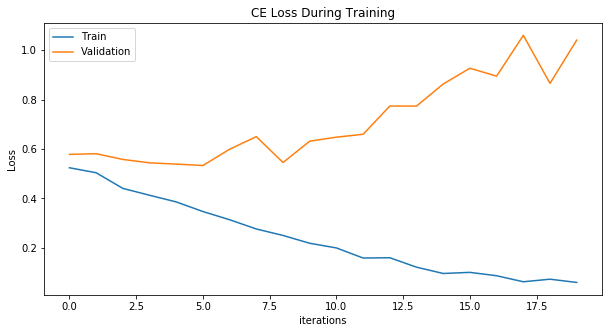

Accuracy of the network: 75 %


In [169]:
# ADAM, lr=1e-4
train(model, optimizer, 100)
accuracy_score(model, val_loader)

In [173]:
save_model_state(model, './model_adadm')

100% (6300 of 6300) |####################| Elapsed Time: 0:09:17 Time:  0:09:17


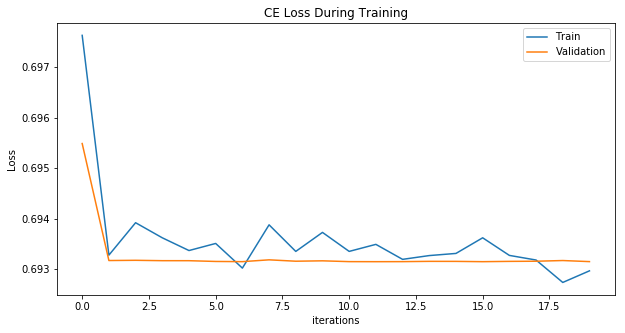

Accuracy of the network: 50 %


In [177]:
# ADAM, lr=1e-3
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-7)
train(model, optimizer, 100)
accuracy_score(model, val_loader)

100% (6300 of 6300) |####################| Elapsed Time: 0:09:16 Time:  0:09:16


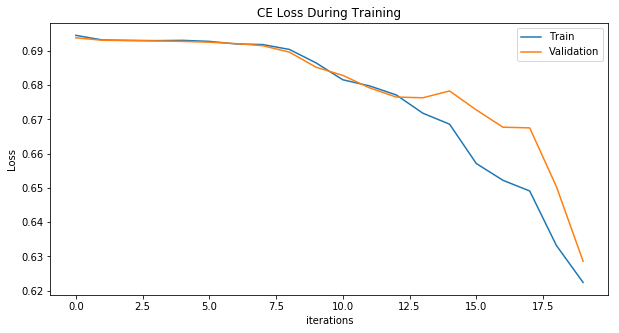

Accuracy of the network: 62 %


In [192]:
# SGD, lr=1e-3
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr = 1e-3, momentum = 0.9)
train(model, optimizer, 100)
accuracy_score(model, val_loader)

In [176]:
model = Net().to(device)
load_model_state(model, './model_adadm')
accuracy_score(model, val_loader)

Accuracy of the network: 75 %


### Task 9 (1 pt.): Bad activation function
Using your conclusions from the <span style="color:red;">Task 6</span>, choose the worst activation function and replace all activations in your model from the previous <span style="color:red;">Task 8</span> with this one. Demonstrate the training and validation performance of this version of the model.

In [203]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.dropout = nn.Dropout(0.6)
        self.fc1 = nn.Linear(64*25*25, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, 2)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(torch.sign(self.conv1(x)))
        x = self.pool(torch.sign(self.conv2(x)))
        x = self.pool(torch.sign(self.conv3(x)))
        x = self.dropout(x)
#         print (x.shape)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(torch.sign(self.fc2(x)))
        x = self.softmax(self.fc3(x))
        
        return x

100% (3150 of 3150) |####################| Elapsed Time: 0:04:34 Time:  0:04:34


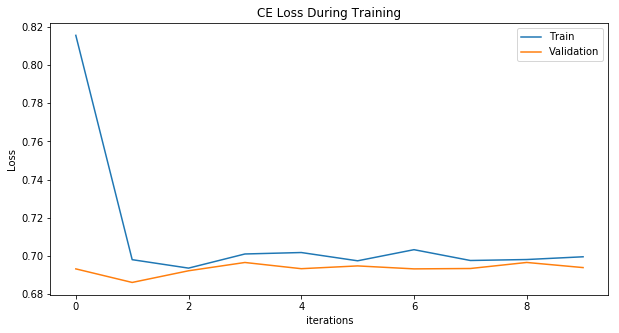

Accuracy of the network: 50 %


In [204]:
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-7)
train(model, optimizer, 50)
accuracy_score(model, val_loader)